## Resources for this week
1. [NumPy Illustrated: The Visual Guide to NumPy](https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d) HIGHLY recommend
2. [A Visual Intro to Numpy](http://jalammar.github.io/visual-numpy/)
3. [Numpy: The Absolute Basics for Beginners](https://numpy.org/devdocs/user/absolute_beginners.html#)
4. [matplotlib tutorials](https://matplotlib.org/stable/tutorials/index.html)

For the more advanced users:
5. [From Python to Numpy](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)
6. [Numpy Medkit](https://mentat.za.net/numpy/numpy_advanced_slides/)
7. [Nicolas Rougier's Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial#figures-subplots-axes-and-ticks)
8. [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

General:
9. [matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets)
10. [Python Graph Gallery](https://www.python-graph-gallery.com/) - Hundreds of visualizations with reproducible code
11. [Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)




# Basic Scientific Python with NumPy
Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. Most widely used Python data processing libraries are built upon (pandas, OpenCV, scikit, scipy), inspired by (PyTorch), or can efficiently share data with (TensorFlow, Keras, etc) NumPy. Understanding how NumPy works gives a boost to your skills in those libraries as well. 

The central concept of NumPy is an n-dimensional array. To quote [the docs](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html), "a `ndarray` object represents a multidimensional, homogeneous array of fixed-size items". The beauty of it is that most operations look just the same, no matter how many dimensions an array has. In many cases, a working analogy to an ndarray is a python list that has a fixed size and only contains similar items. However, under the hood there are some significant differences between a list or a ndarray. I am not going to detail on these under the hood details unless absolutely necessary, but I will be happy to share resources for the curious.

Let's jump in!


## Anatomy of an array

### Initialising Arrays
A numpy array is a grid of values, all of the **same data type**, and is *indexed* by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

To initialize a numpy array we can use a python list and call the `np.array` function on it. To access a specific element from the array, we can use the `[]` operator much like python lists. In multidimensional arrays, we can access the specific elements by using `[]` multiple times like, `array[0][1]` or by providing a list of indices like `array[0,1]`. The first index corresponds to the row and the second to columns.

In [1]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print("a = ", a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print("b = ", b)
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], 
      b[0][1],   # valid use
      b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
a =  [5 2 3]
b =  [[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays. You can find the precise usage instructions in [the documentation](https://numpy.org/devdocs/reference/routines.array-creation.html#routines-array-creation).

In [2]:
a = np.zeros((2,2))   # Create an array of all zeros of shape (2,2)
print("a = ", a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print("b = ", b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array of shape (2,2) filled with 7
print("c = ", c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print("d = ", d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print("e = ", e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

a =  [[0. 0.]
 [0. 0.]]
b =  [[1. 1.]]
c =  [[7 7]
 [7 7]]
d =  [[1. 0.]
 [0. 1.]]
e =  [[0.66286291 0.58386715]
 [0.29529951 0.93080492]]


### ⏰ Exercise 1
It is often necessary to create an array which matches an existing one by shape and elements' type. To do so, all the functions that create an array filled with a constant value have a `_like` counterpart - `np.zeros` has `np.zeros_like`, `np.ones` has `np.ones_like` and so forth. You can find all such functions [here in the documentation](https://numpy.org/devdocs/reference/routines.array-creation.html#from-shape-or-value).

Your task is to:
  1. Create an array of 3 rows and 2 columns filled with random values. Let's call it `Rando`.
  2. Use all `_like` methods in the documentation to create new arrays like `Rando`. Wherever you need to give a constant value, give one of your choice.
  3. Print each new array and also print the shape and data type for them.

In [3]:
# Array generated with random numbers of size (3,2)
Rando = np.random.random((3,2))
print(f"Random Generated ndarray: \n {Rando} \n Shape: {Rando.shape} \n Datatype: {Rando.dtype} \n")

# using numpy.empty_like - Array of uninitialized (arbitrary) data with the same shape and type as Rando
type_one = np.empty_like(Rando)
print(f"Array generated from empty_like: \n {type_one} \n Shape: {type_one.shape} \n Datatype: {type_one.dtype} \n")

# using numpy.ones_like - Array of ones with the same shape and type as Rando
type_two = np.ones_like(Rando)
print(f"Array generated from ones_like: \n {type_two} \n Shape: {type_two.shape} \n Datatype: {type_two.dtype} \n")

# using numpy.zeros_like - Array of zeros with the same shape and type as Rando
type_three = np.zeros_like(Rando)
print(f"Array generated from zeros_like: \n {type_three} \n Shape: {type_three.shape} \n Datatype: {type_three.dtype} \n")

# using numpy.full_like - Array of fill_value with the same shape and type as Rando
type_four = np.full_like(Rando, fill_value=5)
print(f"Array generated from full_like: \n {type_four} \n Shape: {type_four.shape} \n Datatype: {type_four.dtype} \n")

Random Generated ndarray: 
 [[0.93768074 0.51025325]
 [0.97982346 0.84342955]
 [0.72310619 0.55172762]] 
 Shape: (3, 2) 
 Datatype: float64 

Array generated from empty_like: 
 [[0.93768074 0.51025325]
 [0.97982346 0.84342955]
 [0.72310619 0.55172762]] 
 Shape: (3, 2) 
 Datatype: float64 

Array generated from ones_like: 
 [[1. 1.]
 [1. 1.]
 [1. 1.]] 
 Shape: (3, 2) 
 Datatype: float64 

Array generated from zeros_like: 
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 
 Shape: (3, 2) 
 Datatype: float64 

Array generated from full_like: 
 [[5. 5.]
 [5. 5.]
 [5. 5.]] 
 Shape: (3, 2) 
 Datatype: float64 



### ⏰ Exercise 2
Numpy also has two more very useful methods called `np.arange` and `np.linspace` that can create arrays. Search the documentation for their usage and print two sequences of length 10 using these methods. You can use any numbers of your choice as long as the length of the sequence generated is 10.

In [4]:
# using np.arange - Return evenly spaced values within a given interval
seq_one = np.arange(start=0, stop=10, step=1, dtype=float)
print(f"Sequence one using np.arange: \n {seq_one}")

# using np.linspace - returns num equally spaced samples in the closed interval [start, stop]
seq_two = np.linspace(start=2, stop=20, num=10)
print(f"Sequence two using np.linspace: \n {seq_two}")

Sequence one using np.arange: 
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Sequence two using np.linspace: 
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


### Data types
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [5]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int32)   # Force a particular datatype
print(x.dtype)                         # Prints "int32"

int64
float64
int32


You can read all about numpy datatypes [in the documentation](https://numpy.org/doc/stable/reference/arrays.dtypes.html) or [here](https://betterprogramming.pub/a-comprehensive-guide-to-numpy-data-types-8f62cb57ea83). Most importantly, numpy supports complex numbers!

### Axis for arrays
Axes are defined for arrays with more than one dimension. For example, a 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1). The rank of the array is the total number of axes it has. More practically, if you print out the shape of an array, the length of the shape is the total number of axes. So an an array with shape `(2,4,5)` has 3 axes.

In many operations (e.g., sum) you need to tell NumPy if you want to operate across rows or columns. For example, we can sum each column of an array, in which case we operate along rows, or axis 0:

In [6]:
x = np.random.random((3,4))
print(x)
x.sum(axis=0)

[[0.03166765 0.64923154 0.7508031  0.7834288 ]
 [0.54710143 0.18579527 0.46395532 0.86466553]
 [0.02026382 0.97142366 0.90004089 0.38074098]]


array([0.5990329 , 1.80645048, 2.1147993 , 2.02883532])

To make it more concrete, using `axis` parameter for functions tells the function to operate *across* that axis. So when we set `axis=0`, we’re not summing the rows. When we set `axis = 0`, we’re aggregating the data such that we collapse the rows, or we collapse `axis 0`. Similarly, if we set `axis=1` it will collapse the columns.
![numpy-axes-np-sum-axis-0[1].png](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2018/12/numpy-axes-np-sum-axis-0.png)

## Indexing Arrays
Now that we know how to put data into an array, let's discuss how to get it back. As always here are the [docs for this](https://numpy.org/doc/stable/user/basics.indexing.html#flat-iterator-indexing).

### Indexing and slicing with ints
We have already covered a little bit of this earlier. The easiest way to get the data back is to use the `[]` operator. Similar to Python lists, numpy arrays can be sliced using the `[]` operator. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [7]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


Wait a second! What is a view?
All of the indexing methods presented above are actually so-called “views” into the array. They don’t store the data and reflect the changes in the original array if it happens to get changed after being indexed.

All of those methods are mutable: They allow modification of the original array contents through assignment, as shown above. 

In [8]:
a = np.array([1,2,3])
b = a # no copy
c = a[:] # no copy
d = a[1:3] # no copy
e = np.copy(a) # copy

import copy
f = copy.deepcopy(a) # copy

# if you change something that does not create a copy, it will also change the original
print(a)
d[0] = 5
print(a) # prints [1,5,3]

[1 2 3]
[1 5 3]


We can mix integer indexing and slicing. Doing this will result in a lower rank than original however.

In [9]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Lastly, in a very very interesting way, we can use other arrays to index an array. This is called fancy indexing.

In [10]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


In [11]:
# An example of how we can utilize integer array indexing
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
# np.arange(4)->array([0, 1, 2, 3]), so  a[[0, 1, 2, 3], [0, 2, 0, 1]]
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"     


# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


### Conditional Indexing and Slicing
We can use an array of booleans to index an array

In [12]:
a = np.array([1,2,3,5,6,8])
idx = [True, False, False, True, False, True]
print(a[idx]) # prints [1, 5, 8]

[1 5 8]


... and we can generate boolean arrays by using conditionals

In [13]:
print(a>3) # prints [False False False True True True]

[False False False  True  True  True]


... so we can combine them and use conditionals to index arrays directly.

In [14]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


You can even use conditions on another array to index an array (BE CAREFUL!). A clear use case is where you want to select training examples that have a specific label.

In [15]:
a = np.array([1,2,3,4,5,6])
b = np.array([1,2,2,1,2,1])

print(a[b==2]) # prints ... what?

[2 3 5]


Aaaaaaand there is a lot more where that came from, particularly `np.any` and `np.all`. Reading the documentation is a must.

## Reshaping
We can reshape numpy arrays to any shape and rank as long as the total number of elements remain the same.

In [16]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
b = a.reshape(4, 3)
print(b)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [17]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
b = a.reshape(3, 3) # throws an error
print(b)

ValueError: cannot reshape array of size 12 into shape (3,3)

When we provide the shape we are allowed to have one "unknown" dimension. Just one though.

Meaning that you do not have to specify an exact number for one of the dimensions in the reshape method. Instead, pass -1 as the value, and NumPy will calculate this number for you. 

So for example, if I know what height and breadth of an image I want, I can pass -1 instead of calculating the exact number of channels I will need.

In [18]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
b = a.reshape(-1, 3) # I want three columns, but I don't need to calculate the number of rows
print(b, b.shape)

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
b = a.reshape(2, -1, 3) # works in higher dimensions too
print(b, b.shape)

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
b = a.reshape(-1, -1, 3) # throws an error
print(b)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] (4, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]] (2, 2, 3)


ValueError: can only specify one unknown dimension

## Array Ops
Arithmetic is one of the places where NumPy speed shines most. Vector operators are shifted to the c++ level and allow us to avoid the costs of slow Python loops. NumPy allows the manipulation of whole arrays just like ordinary numbers:

In [19]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


If we use a integer, it is bumped up to be an array. This is called broadcasting.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation [from the documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or [this explanation](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc) or this [visual one](https://towardsdatascience.com/broadcasting-in-numpy-58856f926d73). 

In [20]:
print(x+5)
print(y/3)

[[6. 7.]
 [8. 9.]]
[[1.66666667 2.        ]
 [2.33333333 2.66666667]]


Numpy can do matrix operations (surprise surprise)

In [21]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


And a whole bunch of math ops. When we use numpy math ops, we don't need to iterate over the entire array. This *vectorization* is the key to numpy's utility. I think of it as eliminating for loops entirely from my code and convert everything in terms of vector/matrix/tensor operations.

In [22]:
a = np.array([1,2,3,4,5,6])
b = np.array([6,7,8,9,10])
c = np.array([[1,2],[3,4]])

print(np.exp(a))
print(np.sin(b))
print(np.sqrt(c))

[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591
 403.42879349]
[-0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111]
[[1.         1.41421356]
 [1.73205081 2.        ]]


And finally, numpy offers a bunch of methods that can give us *reductions*. A reduction is collapsing an array to a smaller dimensional array. One common way to do this would be to take the sum of all elements, for example, or finding statistics. Here you can set the axis arguments to perform operations along a certain dimension.

In [23]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"; can also use x.sum()
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

print(x.max()) # prints 4
print(x.max(axis=1)) # take max for each row (collapsing along columns); prints [2,4]

print(x.std())
print(x.std(axis=0))


10
[4 6]
[3 7]
4
[2 4]
1.118033988749895
[1. 1.]


For more details use this [other website](https://r.mtdv.me/blog/posts/nodocs) that is NOT the [documentation](https://numpy.org/doc/stable/reference/arrays.ndarray.html#calculation).

## ⏰ Exercise 3
Concatenation and padding are quite essential in a lot of things we do. Please look up how to perform concatenation and padding in the documentation and then:
  1. Initialize two random vectors of length 6, and concatenate them to obtain a large vector of length 12, a matrix with shape (6,2) and a matrix with shape (2,6). Print the new arrays and their shapes.

  2. Initialize a random 3x3 matrix. Use `np.pad` to evenly pad zeros on all sides such that final shape becomes 5x5. Print the new array and it's shape.


In [24]:
## Intialize 2 random vectors
vec_one = np.random.random(6)
vec_two = np.random.random(6)

vec_concat_one = np.concatenate((vec_one, vec_two), axis = 0)
print("Concatenated Vector of length 12: \n", vec_concat_one)
print("Shappe: ", vec_concat_one.shape)
print("")

vec_concat_two = np.column_stack((vec_one, vec_two))
print("Concatenated Matrix of shape 6,2: \n", vec_concat_two)
print("Shappe: ", vec_concat_two.shape)
print("")

vec_concat_three = np.vstack((vec_one, vec_two))
print("Concatenated Matrix of shape 2,6: \n", vec_concat_three)
print("Shappe: ", vec_concat_three.shape)
print("")

rand_matrix = np.random.random((3,3))
print("Original matrix: \n", rand_matrix)
# pad_width = ((top, bottom), (left, right)) or pad_width =((1),)) 
padded_matrix = np.pad(rand_matrix, pad_width=((1,1),(1,1)))
print("Padded matrix: \n", padded_matrix)

Concatenated Vector of length 12: 
 [0.65544405 0.66901779 0.85347307 0.54479765 0.03106407 0.2762169
 0.93666283 0.69688754 0.76593269 0.66717083 0.30986212 0.27827897]
Shappe:  (12,)

Concatenated Matrix of shape 6,2: 
 [[0.65544405 0.93666283]
 [0.66901779 0.69688754]
 [0.85347307 0.76593269]
 [0.54479765 0.66717083]
 [0.03106407 0.30986212]
 [0.2762169  0.27827897]]
Shappe:  (6, 2)

Concatenated Matrix of shape 2,6: 
 [[0.65544405 0.66901779 0.85347307 0.54479765 0.03106407 0.2762169 ]
 [0.93666283 0.69688754 0.76593269 0.66717083 0.30986212 0.27827897]]
Shappe:  (2, 6)

Original matrix: 
 [[0.52401227 0.79462402 0.24905898]
 [0.66498947 0.45024934 0.60460944]
 [0.87854552 0.52058116 0.60106062]]
Padded matrix: 
 [[0.         0.         0.         0.         0.        ]
 [0.         0.52401227 0.79462402 0.24905898 0.        ]
 [0.         0.66498947 0.45024934 0.60460944 0.        ]
 [0.         0.87854552 0.52058116 0.60106062 0.        ]
 [0.         0.         0.         0.    

# Images as arrays
You probably know by now that images are basically large matrices with each element of the matrix representing a pixel. The value at each pixel is most commonly an integer between 0 and 255 encoding the brightness with 0 being completely black and 255 being white.

So what we just described was a 2D array with shape (height, wdith) and data type `uint8`. We need 8 bits to store integers from 0 to 255 hence `uint8` and the image is many times referred to as an 8-bit image. We sometimes have 12-bit or 16-bit images as well. That is exactly how we treat images in python. All your favorite libraries - OpenCV, scikit-image, PIL, what have you - use numpy arrays to represent images. 

If it is a color image, then we store 3 values at each pixel - the intensity of Red, Green and Blue colors. We also call them "channels" - the Red channel, Green channel and the Blue Channel. Each of the 3 values is still an integer between 0-255. The image is then a 3D matrix with shape (height, width, 3) and datatype `uint8`.

We can verify this real quick:

In [25]:
# importing the data module from scikit-image for a sample image
from skimage import data
import skimage.color
import matplotlib.pyplot as plt

# get a sample image
image = data.astronaut()
# showing image shape
print(image.shape) # height width 3 because it is a color image

# lets make it a grayscale image
grayscale = skimage.color.rgb2gray(image)
print(grayscale.shape) # height width

# datatype
print(image.dtype, grayscale.dtype) # what happened here?? You know where to look

# max elements
print(image.max())
print(grayscale.max()) # can you predict the max for this?

(512, 512, 3)
(512, 512)
uint8 float64
255
1.0


So now, the great thing is you can do any operation on an image that you could do on a NumPy array!

4


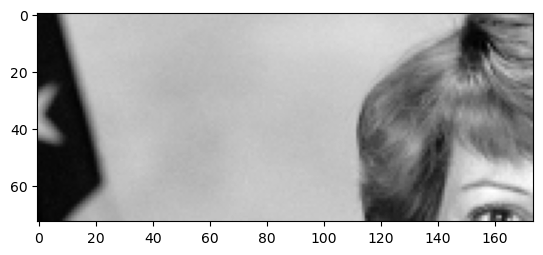

In [26]:
# want to know the value of a pixel? Just use indexing!
pixel = image[124, 421, 2] # 124th row, 421st column of the second (green) channel
print(pixel)
# want to take a crop from the image? Just use slicing!
crop = grayscale[29:102, 41:215]
plt.imshow(crop, cmap="gray")

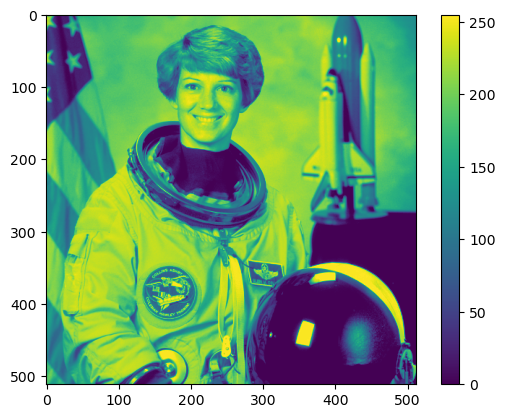

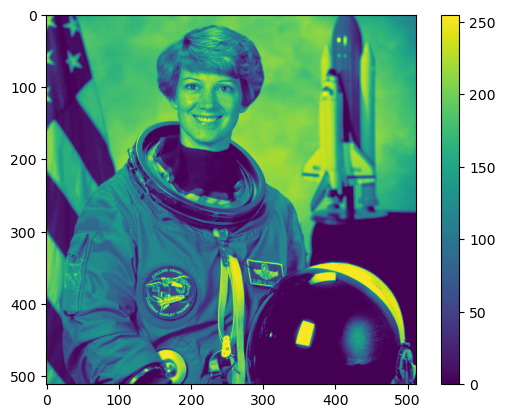

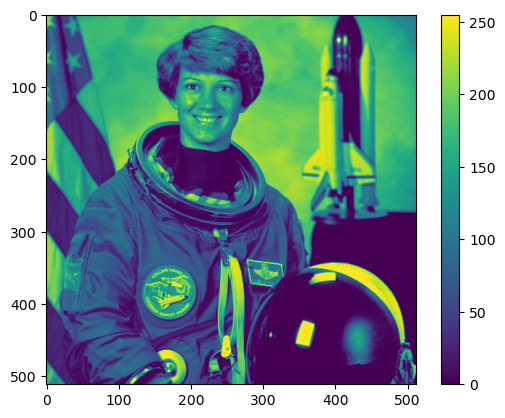

In [27]:
# in this way we can actually isolate the color channels from the image as well
# we will plot the intensities of each color channel
red = image[:, :, 0] # the : means select all
plt.imshow(red) # red is the first channel
plt.colorbar()
plt.show()

green = image[:, :, 1] # the : means select all
plt.imshow(green) # green is the second channel
plt.colorbar()
plt.show()

blue = image[:, :, 2] # the : means select all
plt.imshow(blue)  # blue is the third channel
plt.colorbar()
plt.show()

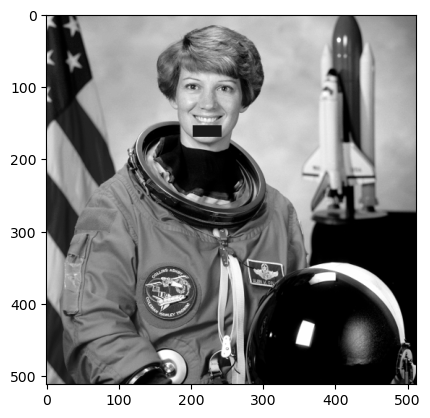

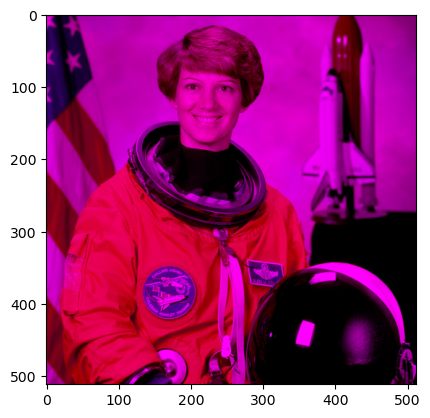

In [28]:
# since arrays are mutable, we can use slicing to set the values for the pixels
# this would change the way the image looks

# first make a copy of the image to avoid overwriting the original
mask = grayscale.copy()
mask[154:170, 203:243] = 0.1 # fill a portion of the image with a constant gray value
plt.imshow(mask, cmap="gray")
plt.show()

# we can do things like set an entire color channel to zero to mess with colors
nored = image.copy()
nored[:, :, 1] = 0 # change all green channel pixels to 0
plt.imshow(nored)
plt.show() # 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


105.75944519042969


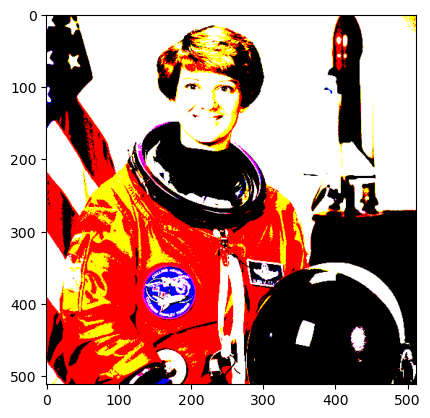

In [29]:
# But that is not all
# you can also do mathematical operations on images

# you can find the mean
print(image[:,:,1].mean()) # find the mean value of the green channel

# you can add or subtract values and other matrices/images
mean_sub = image - image.mean()
plt.imshow(mean_sub)

Why did we get a warning there? since we subtracted the mean there, some of the values in the array will now be negative. Although that is absolutely not illegal, for an array to be an "Image" it needs have values between 0 to 255 if it is an integer array or values between 0 and 1 if it is a float array. When we use `plt.imshow` it assumes that the array to be displayed will follow these rules. If not, it will clip the output so that it falls between the valid range.

Moral: when you perform operations on images, you need to make sure that they are still "images" (which to be fair is not always necessary, but it is for display). You could perform scaling operations to bring the values back in the valid range for display.

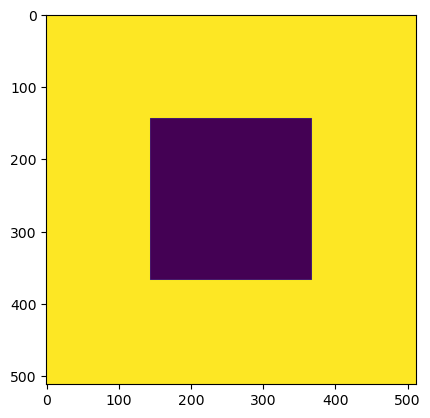

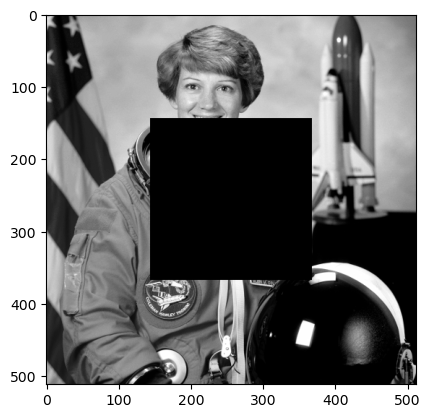

In [30]:
# the last couple of things i want to show are masking and simple thresholding
# if you want only some part of the image, you can create a mask made of booleans
# or 0s and 1s and take the element wise product 

# a mask needs to have the same shape as the image
# Create a square mask
# in reality, your masks will follow some logic
mask = np.zeros((224,224))
mask = np.pad(mask, ((512-224)//2,), constant_values=1) # pad with ones to shape (512,512)
plt.imshow(mask) # first display the mask
plt.show()

# take element-wise product to apply the mask
out = mask*grayscale
plt.imshow(out, cmap="gray")
plt.show()

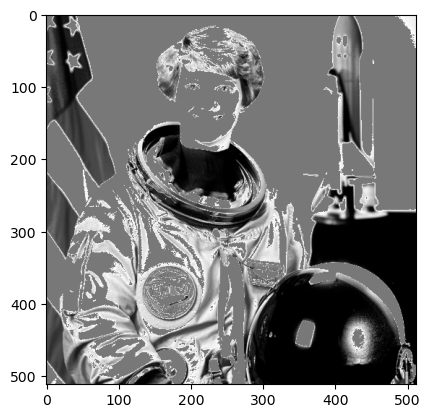

In [31]:
# thresholding is essentially using condtional array indexing
thresh = grayscale > 0.5 # creates a boolean array
# if we now do grayscale[thresh], we will be selectively working with pixels
# with value larger than 0.5
# I am just going to set it to a constant gray value
grayscale[thresh] = 0.235

plt.imshow(grayscale, cmap="gray")
plt.show()

## ⏰ Exercise 4
1. Use `wget` to find an image you know and love.
2. Resize it to (256,256). If there is color, preserve it.
3. Take a random crop from the image of width and height 224 px each. The crop should lie completely inside the original image. For color images, preserve the color!
4. Print the shape of the crop (which must be 224 by 224 in width and height) and plot both the resized original and the crop.

Hint: To take a random crop you can use the something from `np.random` to first give you the starting point of the crop, then simply slice the original image for 224 pixels on both axes. Just make sure that the random number generation does not generate a pixel location that would cause the end point of the crop to go outside the original image.



--2023-02-01 16:50:06--  https://d3cin4duo2vkym.cloudfront.net/images/2020/9/17/Solid_BlueWhite_Logo.png
Resolving d3cin4duo2vkym.cloudfront.net (d3cin4duo2vkym.cloudfront.net)... 54.230.139.91, 54.230.139.39, 54.230.139.224, ...
Connecting to d3cin4duo2vkym.cloudfront.net (d3cin4duo2vkym.cloudfront.net)|54.230.139.91|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://dxbhsrqyrr690.cloudfront.net/sidearm.nextgen.sites/goduke.com/images/2020/9/17/Solid_BlueWhite_Logo.png [following]
--2023-02-01 16:50:06--  https://dxbhsrqyrr690.cloudfront.net/sidearm.nextgen.sites/goduke.com/images/2020/9/17/Solid_BlueWhite_Logo.png
Resolving dxbhsrqyrr690.cloudfront.net (dxbhsrqyrr690.cloudfront.net)... 13.249.126.118, 13.249.126.165, 13.249.126.209, ...
Connecting to dxbhsrqyrr690.cloudfront.net (dxbhsrqyrr690.cloudfront.net)|13.249.126.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13661 (13K) [image/png]
Saving to: 'Soli

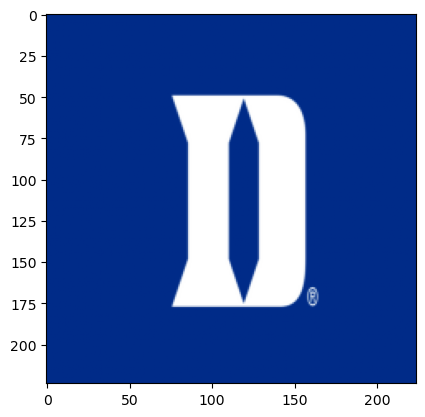

In [32]:
import numpy as np

# get a sample image
!wget https://d3cin4duo2vkym.cloudfront.net/images/2020/9/17/Solid_BlueWhite_Logo.png
image = skimage.io.imread("Solid_BlueWhite_Logo.png")
resized_image = skimage.transform.resize(image, (256,256))
plt.imshow(resized_image)

## Generate a random num (256-224 = 32 (not more than this))
random_num = np.random.randint(32, size=1, dtype=int)[0]
print(random_num)

## Crop the image to 224
crop_img = resized_image[random_num:random_num+224, random_num:random_num+224]
print("Shape of randomly cropped image: ", crop_img.shape)
plt.imshow(crop_img)

## Fourier Transform of an image
Here, we will implement the FFT covered during the class. The FFT is alrealdy implemented in numpy and we will use it for today.

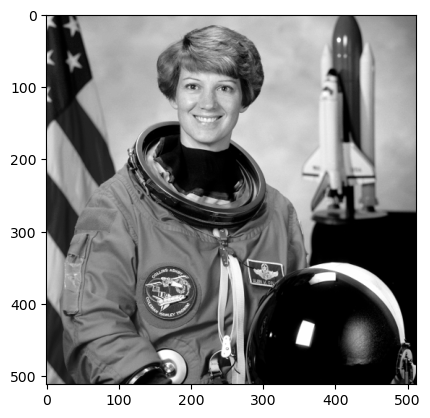

In [33]:
import skimage.io
from skimage import data
import matplotlib.pyplot as plt

original = data.astronaut()
grayscale = skimage.color.rgb2gray(original)
plt.imshow(grayscale, cmap='gray')

TypeError: Image data of dtype complex128 cannot be converted to float

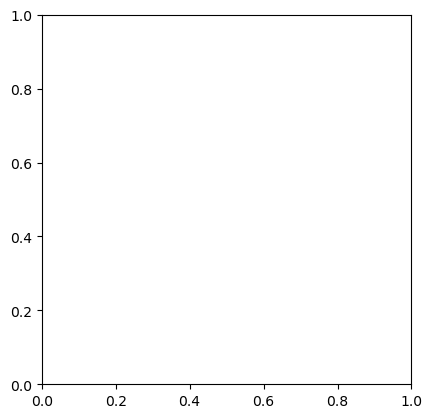

In [34]:
# FFT the image and plot
import numpy as np

grayscale_fft = np.fft.fft2(grayscale) # 2D fft
plt.imshow(grayscale_fft)

Transformed image has complex values so it cannot be plotted. Instead, we usually plot amplitude of the transform.

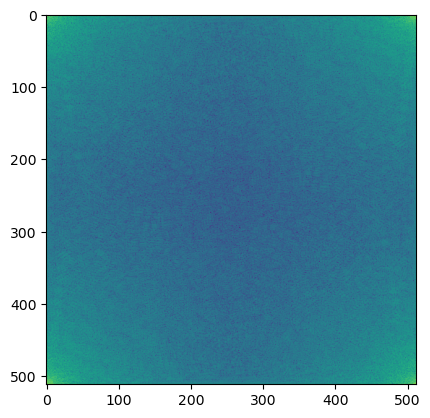

In [35]:
plt.imshow(np.log(np.abs(grayscale_fft))) # np.log is used for visualization purpose

It looks weird, doesn't it? The center part should have the maximum value but it doesn't have it. For visualization purpose and other frequency filtering, we need to rotate the input image by moving the zero-frequency component to the center of the array. It is useful for visualizing a Fourier transform with the zero-frequency component in the middle of the spectrum.

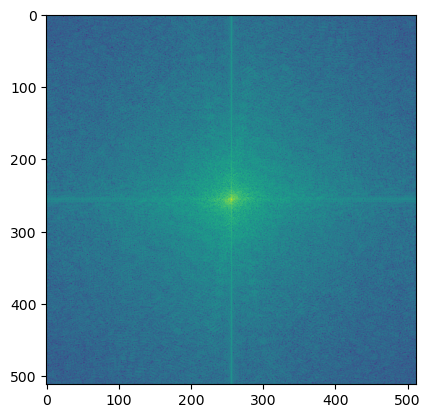

In [36]:
grayscale_fft_shifted = np.fft.fftshift(grayscale_fft)
plt.imshow(np.log(np.abs(grayscale_fft_shifted))) # np.log is used for visualization purpose

Oh so beautiful!!

## Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

Let's start with a simple plotting.

- https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- https://github.com/rougier/matplotlib-tutorial

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook # https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

UsageError: unrecognized arguments: # https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib


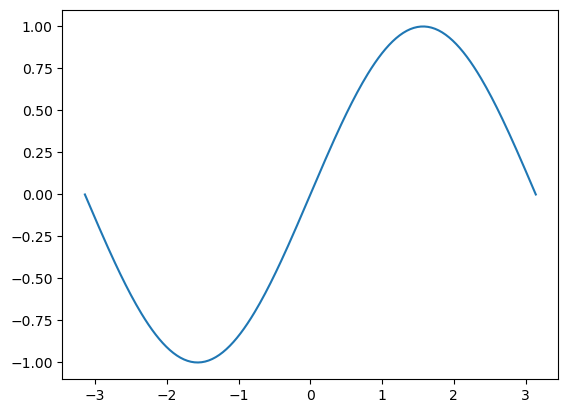

In [38]:
x = np.linspace(-np.pi, np.pi, 256, endpoint=True) # x-axis values, 256 values in between -pi and pi
sin = np.sin(x) # y-axis values, corresponding sin values from x
plt.plot(x, sin) # x-axis: x, y-axis: sin
plt.show()

The plot above is with default settings and you can control the default settings in matplitlib, which includes figure size and dpi, line width, color and style, axis, text and font properties and so on.

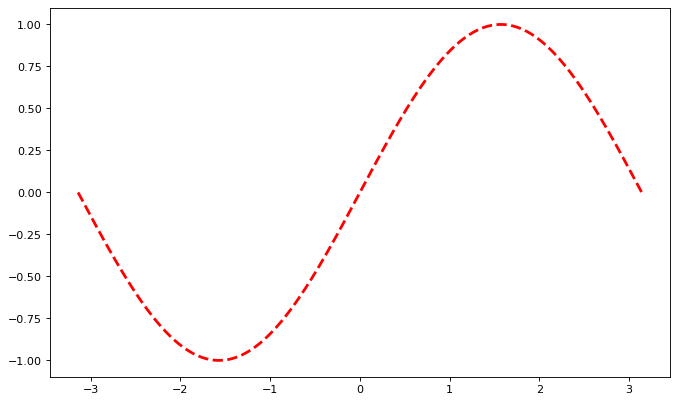

In [39]:
plt.figure(figsize=(10,6), dpi=80) # different figure size and dpi. what is dpi? https://en.wikipedia.org/wiki/Dots_per_inch
plt.plot(x, sin, color="red", linewidth=2.5, linestyle="--") # change color, width, and linestyle of the line
plt.show()

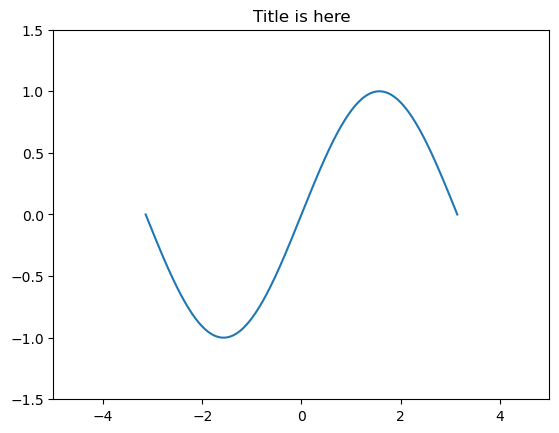

In [40]:
plt.plot(x, sin)
plt.xlim(-5, 5) # set the x limits of the x axis
plt.ylim(-1.5, 1.5) # set the y limits of the x axis
plt.title('Title is here') # put a title
plt.show()

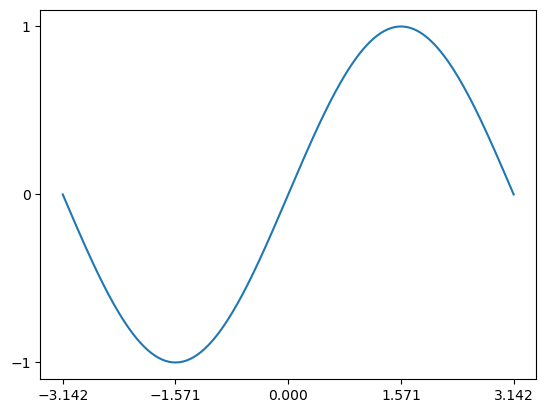

In [41]:
# You can also ticks on the spcific locations
plt.plot(x, sin)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]) # ticks at x = -pi, -pi/2, 0, pi/2, pi
plt.yticks([-1, 0, 1]) # ticks at y = -1, 0 , 1
plt.show()

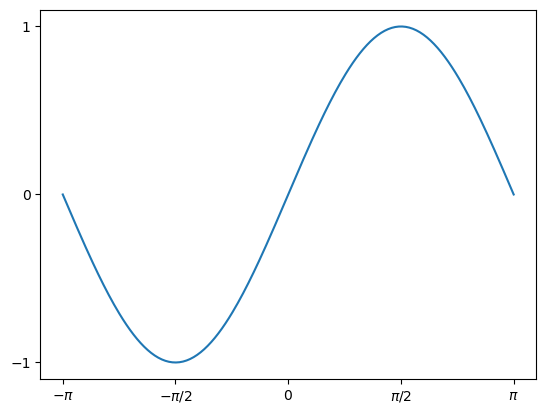

In [42]:
# But ticks at x = -pi, -pi/2, 0, pi/2, pi are not intuitive
# We can also provide corresponding labels for the ticks for the second argument
plt.plot(x, sin)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$']) # ticks at x = -pi, -pi/2, 0, pi/2, pi with label
plt.yticks([-1, 0, 1]) # ticks at y = -1, 0 , 1
plt.show()

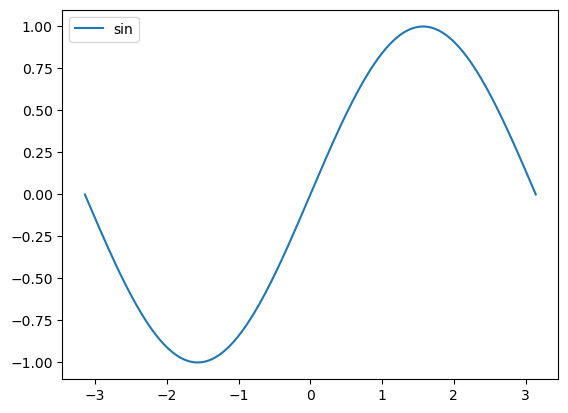

In [43]:
# Finally, you can add a legend. You just need to add one more argument in plt.plot 'label'
plt.plot(x, sin, label='sin')
plt.legend(loc='upper left')
plt.show()

What if we want to plot multiple plots in one figure? How can we plot subplots?
- Figure: A `Figure` object is the outermost container for a matplotlib graphic, which can contain multiple `Axes` objects. It is the entire plot window that you see. 
- Axes: A single object of the `Axes`. Sometimes the plural is confusing but there is an x-axis and a y-axis, that is why it is used. `Axes` object is the basically the actual plot. Your data is passed to the `Axes` to display it.

You can think of the `Figure` object as a box-like container holding one or more `Axes` (actual plots). `Axes` also holds smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels.

![FigureAxes](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

Text(0.5, 1.0, 'A single plot')

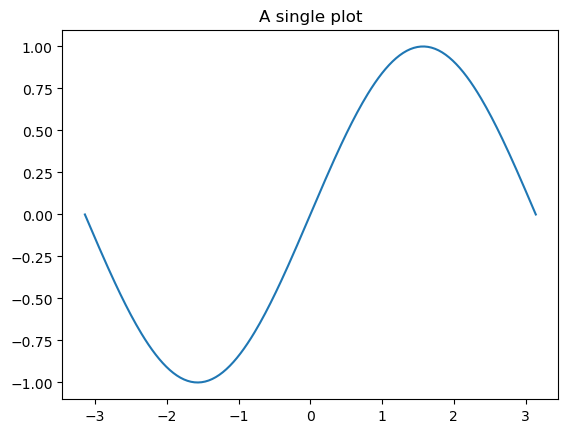

In [44]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
# As you can see from the above document, plt.subplots() without arguments returns a Figure and a single Axes. Default values are nrows=1, ncols=1
fig, ax = plt.subplots() 
ax.plot(x, sin)
ax.set_title('A single plot')

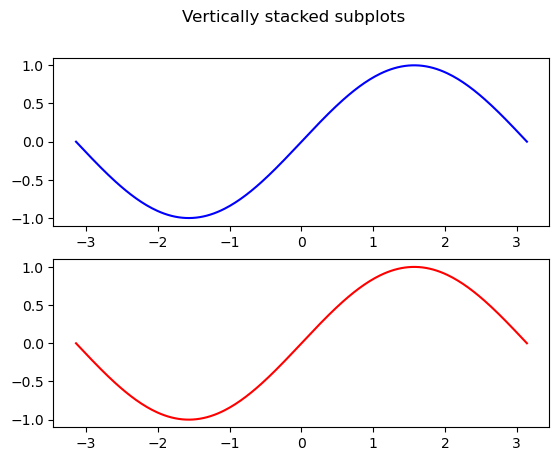

In [45]:
# If you want to stack 2 subplots vertically, you just need to give 2 as an argument
# 2 will be used for nrows argument and default value 1 will be used for ncols 
# you can be explicit in the arguments to avoid confusion
fig, axs = plt.subplots(2) # now axs actually holds a list of two Axes objects
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, sin, color="blue")
axs[1].plot(x, sin, color="red")

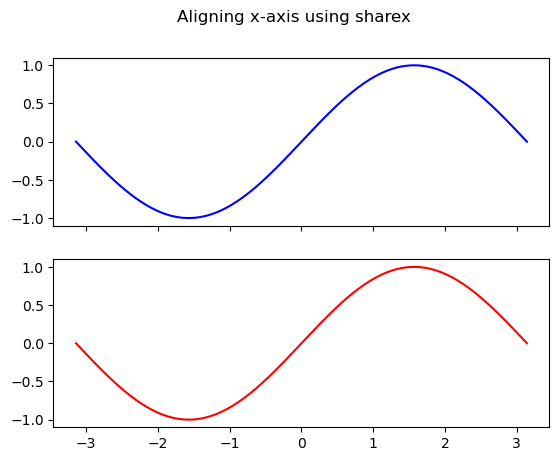

In [46]:
# You can also share and align each axis of subplots
# sidenote, being explicit here
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True) # you can use sharey=True if you want to share y axis in horizontally stacked subplots
fig.suptitle('Aligning x-axis using sharex')
axs[0].plot(x, sin, color="blue")
axs[1].plot(x, sin, color="red")

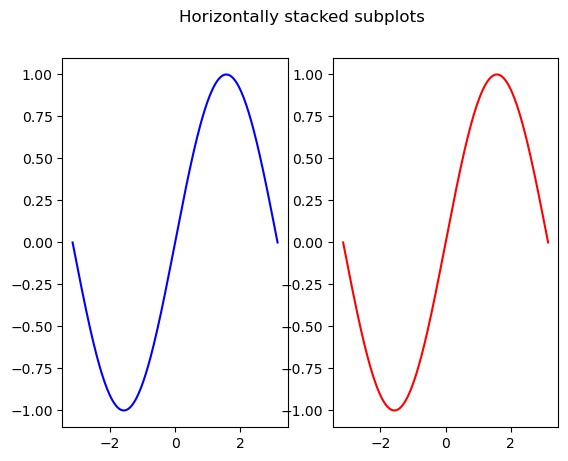

In [47]:
# If you want to stack 2 subplots horizontally
fig, axs = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
axs[0].plot(x, sin, color="blue")
axs[1].plot(x, sin, color="red")

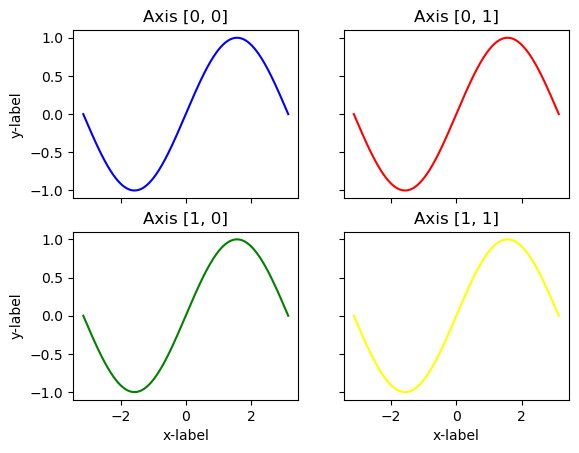

In [48]:
# Stacking subplots in two directions
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, sin, color="blue")
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, sin, color="red")
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, sin, color="green")
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, sin, color="yellow")
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat: # axs.flat makes a list-like structure that we can iterate over
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Let us wrap up by using subplots to plot the fourier transform of the astronaut image. We will also take an inverse transform.

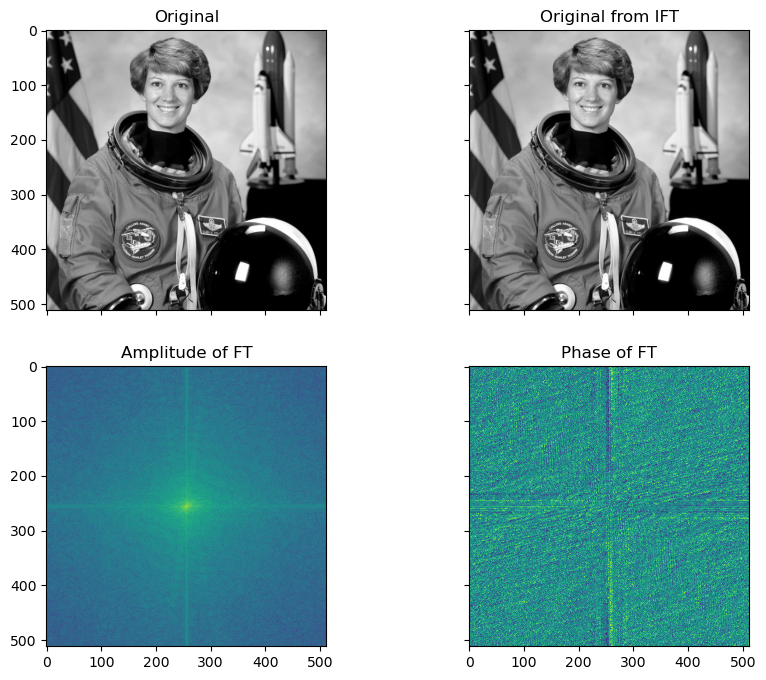

In [49]:
grayscale_fft = np.fft.fft2(grayscale) # 2D fft
grayscale_fft_shifted = np.fft.fftshift(grayscale_fft) # corrected FFT
amplitude = np.abs(grayscale_fft_shifted) # amplitude is the absolute value of the transform
phase = np.angle(grayscale_fft_shifted) # the phase of the transform

# for inverse transform reverse operations in order
# so shift is inverted first, then the transform
inverse = np.fft.ifft2(np.fft.ifftshift(grayscale_fft_shifted))
grayscale_from_inverse = np.abs(inverse)

# now lets plot
# Stacking subplots in two directions
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].imshow(grayscale, cmap="gray")
axs[0, 0].set_title('Original')
axs[0, 1].imshow(grayscale_from_inverse, cmap="gray")
axs[0, 1].set_title('Original from IFT')
axs[1, 0].imshow(np.log(amplitude))
axs[1, 0].set_title('Amplitude of FT')
axs[1, 1].imshow(phase)
axs[1, 1].set_title('Phase of FT')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()